<a href="https://colab.research.google.com/github/HHansi/Machine-Learning-CPD-Course/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size="5.5">Targeted Problem <font>

**Can we predict the type of the house or its floor area, knowing the number of family members and income?**

We can use Linear Regression to predict the floor area using the number of family members and income.

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define random state
random_state = 1234

# Data Loading
It is important to use the cleaned data set to train the model.

In [2]:
# Load the data set
df = pd.read_csv("/content/cleaned_home_data.csv")
df.head(5)

,homeid,residents,income_band,hometype,floorarea,average_income
0,59,2,"£90,000 or more",flat,760,90000.0
1,61,2,"£48,600 to £53,999",house_or_bungalow,685,51299.5
2,62,2,"£43,200 to £48,599",flat,815,45899.5
3,64,4,"£66,000 to £77,999",flat,650,71999.5
4,63,2,"£54,000 to £65,999",house_or_bungalow,725,59999.5


Let's filter out the data columns which we are intended to use for our experiments. 

In [3]:
selected_df = df[['residents', 'average_income', 'floorarea']]
print(f'Selected data size: {selected_df.shape}')
selected_df.head(5)

Selected data size: (245, 3)


,residents,average_income,floorarea
0,2,90000.0,760
1,2,51299.5,685
2,2,45899.5,815
3,4,71999.5,650
4,2,59999.5,725


As seen in the above output, we have data from different value ranges (e.g. residents 0-10, average_income 10,000-90,000).

Thus, we need to scale the values, to support the learning process.

In [4]:
# Scale data using StandardScaler
scaler = StandardScaler().fit(selected_df)
scaled_data = scaler.transform(selected_df)

# Print the output of first 5 rows
scaled_data[:5]

array([[-0.38198211,  1.90922419, -0.31093962],
       [-0.38198211,  0.21773864, -0.56946974],
       [-0.38198211, -0.01827955, -0.12135087],
       [ 1.36728175,  1.12247503, -0.69011712],
       [-0.38198211,  0.59799017, -0.43158701]])

As the next step, let's randomly separate the data set into two partitions: (1) train and (2) test.

We use the train set to train our model and test set to evaluate model performance.

In [5]:
'''
Randomly split data into train(75%) and test(15%) using sklearn train_test_split function.
random_state controls the shuffling applied to the data and is used to reproduce the outputs.
'''
train, test = train_test_split(scaled_data, test_size=0.15, random_state=random_state)

# Print the size of datasets and few initial samples
print(f'Train set size: {train.shape}')
print(f'Train set sample: \n {train[:5]}')

print(f'Test set size: {test.shape}')
print(f'Test set sample: \n {test[:5]}')

Train set size: (208, 3)
Train set sample: 
 [[ 1.36728175  1.90922419  1.89518403]
 [-0.38198211 -0.01827955 -0.24199826]
 [ 1.36728175 -0.01827955 -0.10411553]
 [-0.38198211 -0.92301594 -0.19029223]
 [ 2.24191368  0.21773864  0.96447561]]
Test set size: (37, 3)
Test set sample: 
 [[-0.38198211 -0.92301594  1.24024107]
 [-0.38198211  0.59799017 -0.08688019]
 [ 1.36728175  0.21773864 -0.39711633]
 [ 0.49264982 -0.25429774  0.36123868]
 [ 1.36728175 -0.01827955  2.67077438]]


Now, our data is ready for learning.

# Model 1

As our first model, let's build a **Simple Linear Regression Model**.

According to the targeted problem, our model needs to predict the floor area. Being a simple linear regression model, as variable/ feature, we can use either the number of residents or average income. 

For this model let's use the number of residents as the feature to predict floor area. We can summarise this using x and y notations as follows.
* x = number of residents
* y = floor area

In [6]:
x = train[:, 0].reshape(-1, 1)  # get number of residents values from train set and format
y = train[:, 2].reshape(-1, 1)  # get floor area values from train set and format

regr = LinearRegression()  # create an instance of the class LinearRegression  
regr.fit(x, y)  # train model 

# print coefficient(s)
print(f'Coefficients: {regr.coef_}')

# print intercept
print(f'intercept: {regr.intercept_}')

Coefficients: [[0.39136124]]
intercept: [0.04351998]


Using the given data, linear regression learned the following as the best fitting line.

> *y = 0.0435 + 0.3914x*

Using this best fit, we can predict the floor area given the number of residents.

In [7]:
# make predictions on test data
test_x = test[:, 0].reshape(-1, 1)  # get number of resident values from test set

y_pred = regr.predict(test_x)  # make predictions

For test data set, we predicted floor area values using the number of residents to evaluate our model. 

Intially, let's see the feasibility to do a manual evaluation.

In [8]:
# compare predictions with actuals
test_y = test[:, 2].reshape(-1, 1) # get floor area values from test set to compare with predictions

print(f'Actuals: {test_y.tolist()}')
print(f'Predictions: {y_pred.tolist()}')

Actuals: [[1.2402410713340126], [-0.08688018849106652], [-0.39711632715147466], [0.36123867846285634], [2.670774377379228], [-0.9314118992888442], [-0.4832930323349213], [1.2402410713340126], [-1.6897669049031752], [0.5163567477930604], [-0.1213508705644452], [-0.9314118992888442], [0.11994390394920557], [-0.9486472403255335], [-1.4829428124629032], [-1.2933540610593204], [-0.08688018849106652], [-1.327824743132699], [-1.327824743132699], [2.015831417985033], [-1.3622954252060777], [3.4980707471403165], [-0.8624705351420868], [-1.0175886044722908], [-0.31093962196802793], [0.05100253980244821], [-0.569469737518368], [-0.9141765582521548], [-0.5177637144083], [-0.7245878068485722], [-0.9658825813622228], [0.24059129120603095], [-1.1554713327658057], [-1.4484721303895245], [-0.8452351941053975], [1.4987711868843527], [-0.414351668188164]]
Predictions: [[-0.10597301163705297], [-0.10597301163705297], [0.5786210596627355], [0.23632402401284128], [0.5786210596627355], [-0.10597301163705297]

Since we used scaled data for the model, above-printed actual and predicted values are also in their scaled formats. 

Let's convert them to the normal form (inverse scale) to ease our comparison.

In [9]:
# get real-valued actuals
inverse_scaled_a = scaler.inverse_transform(np.column_stack((test[:, [0,1]], test_y)))  # inverse scale actuals
inverse_scaled_real_a = [round(val.real) for val in inverse_scaled_a[:, 2]]  # convert complex to real numbers and round off the values
print(inverse_scaled_real_a)

# get real-valued predictions
inverse_scaled_p = scaler.inverse_transform(np.column_stack((test[:, [0,1]], y_pred)))  # inverse scale predictions
inverse_scaled_real_p = [round(val.real) for val in inverse_scaled_p[:, 2]]  # convert complex to real numbers and round off the values
print(inverse_scaled_real_p)

[1210, 825, 735, 955, 1625, 580, 710, 1210, 360, 1000, 815, 580, 885, 575, 420, 475, 825, 465, 465, 1435, 455, 1865, 600, 555, 760, 865, 685, 585, 700, 640, 570, 920, 515, 430, 605, 1285, 730]
[819, 819, 1018, 919, 1018, 819, 819, 919, 819, 819, 819, 819, 819, 919, 720, 1018, 919, 819, 919, 1018, 720, 1018, 720, 919, 720, 1018, 819, 819, 919, 1018, 819, 819, 720, 720, 919, 919, 819]


<font size=4 color="blue">**Q.** What are your opinions about this comparison? <font>

Rather than going through each actual and prediction pair (which is infeasible when we are dealing with large data sets), we can easily evaluate our model by calculating the **Mean Squared Error**.

In [10]:
# calcuate mean squared error
error = mean_squared_error(test_y, y_pred)
print(f'Mean squared error: {error:.2f}')

Mean squared error: 1.20


Additionally, a graphical representation can provide us an overview as follows.

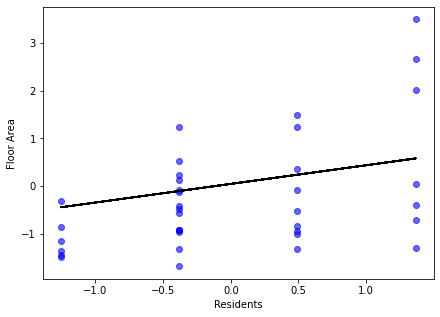

In [11]:
fig = plt.figure(figsize=(7, 5))

plt.scatter(test_x, test_y, color ='b', alpha=0.6)
plt.plot(test_x, y_pred, color ='k')

plt.xlabel("Residents")
plt.ylabel("Floor Area")
  
plt.show()

# Model 2

Let's see how well we can predict the floor area using average income.

For this, again we have to build a simple linear regression model using following x and y values.
* x = average income
* y = floor area

In [12]:
x = train[:, 1].reshape(-1, 1)  # get average income values from train set and format
y = train[:, 2].reshape(-1, 1)  # get floor area values from train set and format

regr = LinearRegression()  # create an instance of the class LinearRegression  
regr.fit(x, y)  # train model 

# print coefficient(s)
print(f'Coefficients: {regr.coef_}')

# print intercept
print(f'intercept: {regr.intercept_}')

Coefficients: [[0.32303074]]
intercept: [0.04954712]


<font size=4 color="blue">**Q.** What is the equation for the best fitting line of model 2? <font>

In [13]:
# make predictions on test data
test_x = test[:, 1].reshape(-1, 1)  # get averge income values from test set

y_pred = regr.predict(test_x)  # make predictions

In [14]:
test_y = test[:, 2].reshape(-1, 1)  # get floor area values from test set to compare with predictions

# calcuate mean squared error
error = mean_squared_error(test_y, y_pred)
print(f'Mean squared error: {error:.2f}')

Mean squared error: 1.25


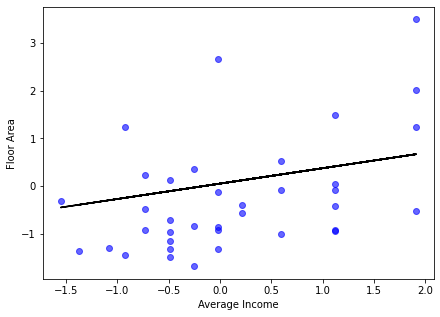

In [15]:
fig = plt.figure(figsize=(7, 5))

plt.scatter(test_x, test_y, color ='b', alpha=0.6)
plt.plot(test_x, y_pred, color ='k')

plt.xlabel("Average Income")
plt.ylabel("Floor Area")
  
plt.show()

# Model 3

As our third model, let's build a **Multiple Linear Regression Model**.

As the name suggests, we can use multiple variables/ features for this model. That means we can use both the number of residents and average income to predict the floor area.

We can summarise this using x and y notations as follows.
* x = number of residents, average income
* y = floor area

In [16]:
x = train[:, [0,1]].reshape(-1, 2)  # get number of residents and average income values from train set and format
y = train[:, 2].reshape(-1, 1)  # get floor area values from train set and format

regr = LinearRegression()  # create an instance of the class LinearRegression 
regr.fit(x, y)  # train model 

# print coefficient(s)
print(f'Coefficients: {regr.coef_}')

# print intercept
print(f'intercept: {regr.intercept_}')

Coefficients: [[0.34125726 0.25334288]]
intercept: [0.04915492]


Using the calculated coefficients and intercept, the best fitting object of model3 can be represented using the following equation.

> *y = 0.0492 + 0.3413x_1 + 0.2533x_2* <br>
> *x_1 = residents* <br>
> *x_2 = average_income* <br>

*Note:* Higher the dimensions, a high dimensional object will be recognised by the model as the best fit.

In [17]:
# make predictions on test data
test_x = test[:, [0,1]].reshape(-1, 2)  # get number of residents and average income values from test set

y_pred = regr.predict(test_x)  # make predictions

In [18]:
test_y = test[:, 2].reshape(-1, 1)  # get floor area values from test set to compare with predictions

# calcuate mean squared error
error = mean_squared_error(test_y, y_pred)
print(f'Mean squared error: {error:.2f}')

Mean squared error: 1.10


For graphical representation, we need to draw a 3D plot.

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Text(0.5, 0, 'Floor Area')

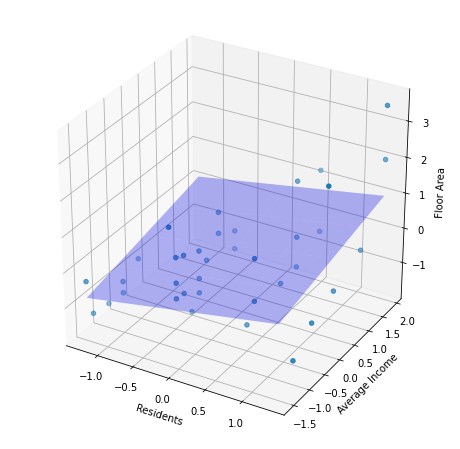

In [19]:
x_surf, y_surf = np.meshgrid(np.linspace(test[:, 0].min(), test[:, 0].max(), 5),np.linspace(test[:, 1].min(),test[:, 1].max(), 5))
temp_x = pd.DataFrame({'Residents': x_surf.ravel(), 'Average Income': y_surf.ravel()})
fittedY=regr.predict(temp_x)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

ax.scatter(test_x[:, 0], test_x[:, 1], test_y)
ax.plot_surface(x_surf,y_surf,fittedY.reshape(x_surf.shape), color='b', alpha=0.3)

ax.set_xlabel("Residents")
ax.set_ylabel("Average Income")
ax.set_zlabel("Floor Area")

<font size=4 color="blue">**Q.** What is the best model we built to predict the floor area? <font>